In [ ]:
!pip install mlxtend --quiet

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import dlib
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import os
import imageio
from mlxtend.image import extract_face_landmarks

In [28]:
# data = pd.read_csv("age_gender.csv",usecols=["age", "ethnicity", "gender"])
# ethnic_dict = {0:"White",1:"Black",2:"Asian",3:"Indian",4:"Hispanic"}
# data["ethnicity"] = [ethnic_dict[x] for x in data["ethnicity"]]
# data["gender"] =["Male" if x ==0 else "Female" for x in data["gender"]]
# data["path"] = pd.Series(["images\img"+str(x)+".jpg" for x in np.arange(0,len(data))])
# data.to_csv("cleaned_original.csv")

In [29]:
data = pd.read_csv("cleaned_original.csv")

In [120]:
for n,m in enumerate(["age","of","calamity"]):
    print(n,m)

0 age
1 of
2 calamity


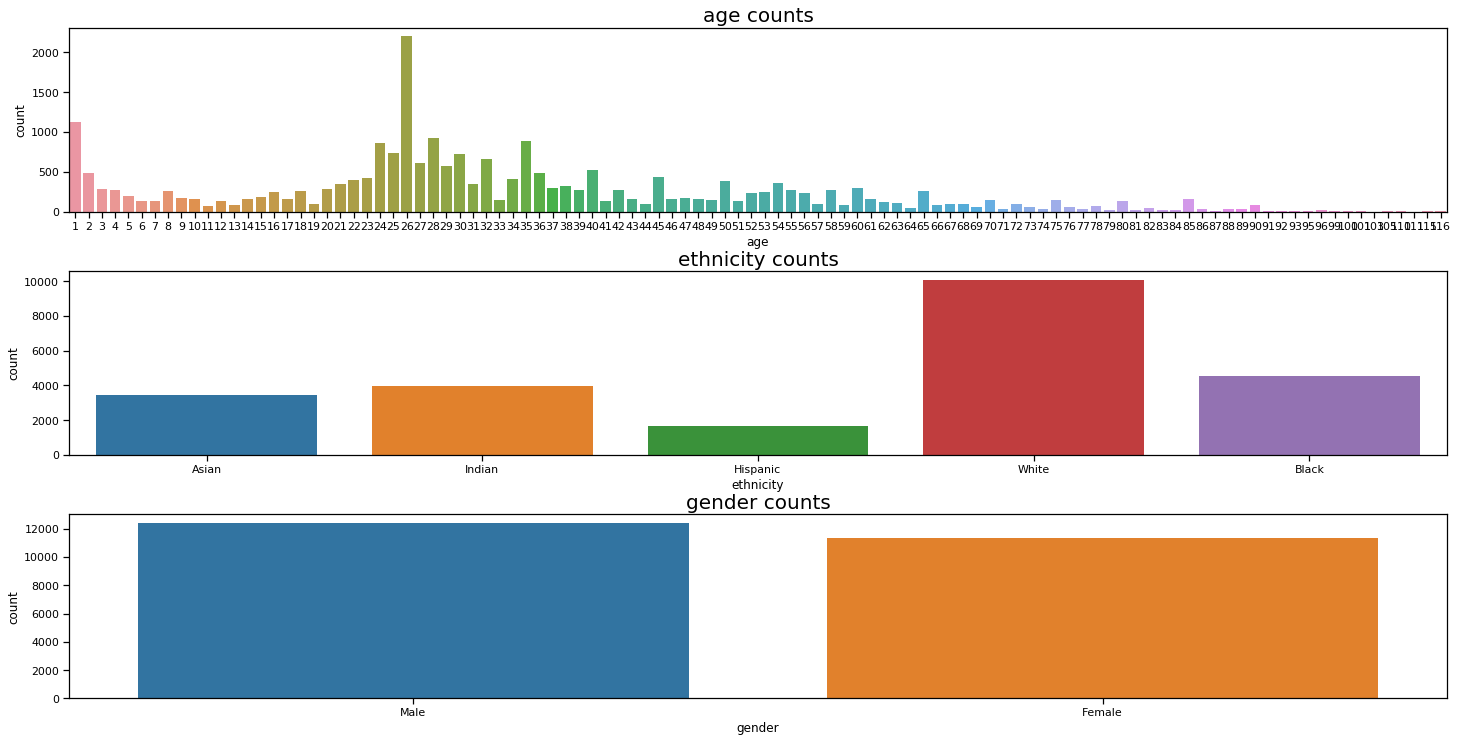

In [136]:
def plot_metrics():
    fig,axs = plt.subplots(3,1,figsize=(20,10))
    fig.tight_layout(h_pad=3)
    #sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
    for i,col in enumerate(["age","ethnicity","gender"]):
        sns.countplot(data[col],ax = axs[i])
        axs[i].set_title(col+" counts",size=20)
    plt.show
    return
plot_metrics()

In [115]:
def get_photo(img_path):
    return imageio.imread(os.path.join(img_path))

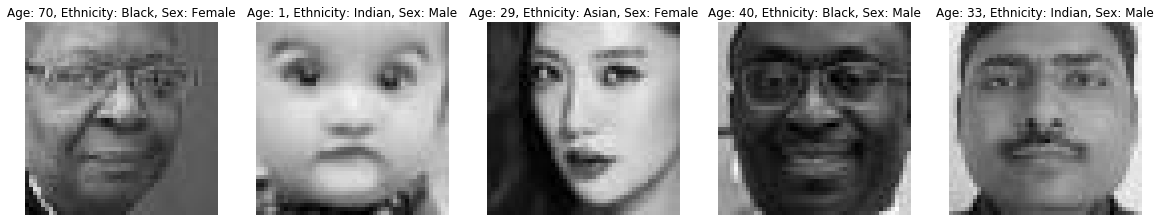

In [47]:
def n_random_faces(n):
    fig, axes = plt.subplots(1, n, figsize=(20, 10))
    folder = r"images"
    for i in range(n):
        row = data.sample().reset_index()
        axes[i].set_title('Age: {0}, Ethnicity: {1}, Sex: {2}'.format(row["age"][0], row['ethnicity'][0], row["gender"][0]))
        axes[i].imshow(get_photo(row['path'][0]))
        axes[i].axis('off')
    return
n_random_faces(5)

In [101]:
has_landmarks = np.array([])
for path in data["path"]:
    if extract_face_landmarks(get_photo(path)) is not None:
        has_landmarks = np.append(True,has_landmarks)
    else:
        has_landmarks = np.append(False,has_landmarks)
has_landmarks = pd.Series(has_landmarks.astype("bool"))

C:\Users\19168\anaconda3\lib\site-packages\mlxtend\image\extract_face_landmarks.py:66: UserWarning: No face detected.
  warnings.warn('No face detected.')


array([1., 0., 1., ..., 1., 1., 1.])

In [114]:
landmark_faces = data[has_landmarks.values]
landmark_faces.describe

<bound method NDFrame.describe of        Unnamed: 0  age ethnicity  gender                 path
0               0    1     Asian    Male      images\img0.jpg
2               2    1     Asian    Male      images\img2.jpg
4               4    1     Asian    Male      images\img4.jpg
5               5    1     Asian    Male      images\img5.jpg
6               6    1     Asian    Male      images\img6.jpg
...           ...  ...       ...     ...                  ...
23700       23700   99     White  Female  images\img23700.jpg
23701       23701   99     Black  Female  images\img23701.jpg
23702       23702   99     Asian  Female  images\img23702.jpg
23703       23703   99     Asian  Female  images\img23703.jpg
23704       23704   99     White  Female  images\img23704.jpg

[22831 rows x 5 columns]>

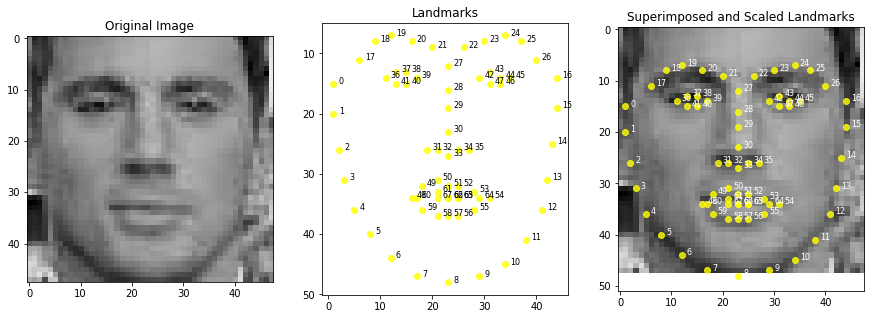

array([[ 1, 15],
       [ 1, 20],
       [ 2, 26],
       [ 3, 31],
       [ 5, 36],
       [ 8, 40],
       [12, 44],
       [17, 47],
       [23, 48],
       [29, 47],
       [34, 45],
       [38, 41],
       [41, 36],
       [42, 31],
       [43, 25],
       [44, 19],
       [44, 14],
       [ 6, 11],
       [ 9,  8],
       [12,  7],
       [16,  8],
       [20,  9],
       [26,  9],
       [30,  8],
       [34,  7],
       [37,  8],
       [40, 11],
       [23, 12],
       [23, 16],
       [23, 19],
       [23, 23],
       [19, 26],
       [21, 26],
       [23, 27],
       [25, 26],
       [27, 26],
       [11, 14],
       [13, 13],
       [15, 13],
       [17, 14],
       [15, 15],
       [13, 15],
       [29, 14],
       [31, 13],
       [33, 14],
       [35, 14],
       [33, 15],
       [31, 15],
       [16, 34],
       [18, 32],
       [21, 31],
       [23, 32],
       [25, 32],
       [28, 33],
       [31, 34],
       [28, 36],
       [25, 37],
       [23, 37],
       [21, 37

In [97]:
def find_landmarks(img_path):
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    img = get_photo(img_path)
    landmarks = extract_face_landmarks(img)
    ax[0].imshow(img)
    ax[0].set_title("Original Image")
    ax[1].scatter(landmarks[:, 0], landmarks[:, 1], alpha=0.8,c="yellow")
    for i in range(landmarks.shape[0]):
        ax[1].text(landmarks[i,0]+1, landmarks[i,1], str(i), size=8)
    ax[1].set_title("Landmarks")
    ax[1].set_ylim(ax[1].get_ylim()[::-1])
    img2 = img.copy()
    ax[2].imshow(img2)
    ax[2].scatter(landmarks[:, 0], landmarks[:, 1], alpha=0.8,c="yellow")
    for i in range(landmarks.shape[0]):
        ax[2].text(landmarks[i,0]+1, landmarks[i,1], str(i), size=8,c="white")
    ax[2].set_title("Superimposed and Scaled Landmarks")
    plt.show()
    return landmarks

find_landmarks("images\img10246.jpg")

18 October: I've filtered the dataset by faces that our program can detect, there are 22831 rows. I also got rid of the pixel data since we've already converted it into jpg. Our current pipeline relies on knowing the path of the images, which is a column in the dataset. 

Next tasks, distance calculation between landmarks!